In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
pd.set_option('display.max_columns', None)

In [4]:

import seaborn as sns

sns.set()

In [5]:
df = pd.read_csv('prod_with_chem.csv')

In [32]:
df_matrix = df.drop(['Unnamed: 0','name', 'mfg', 'chem'], axis = 1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a20eb4a90>,
      dtype=object)

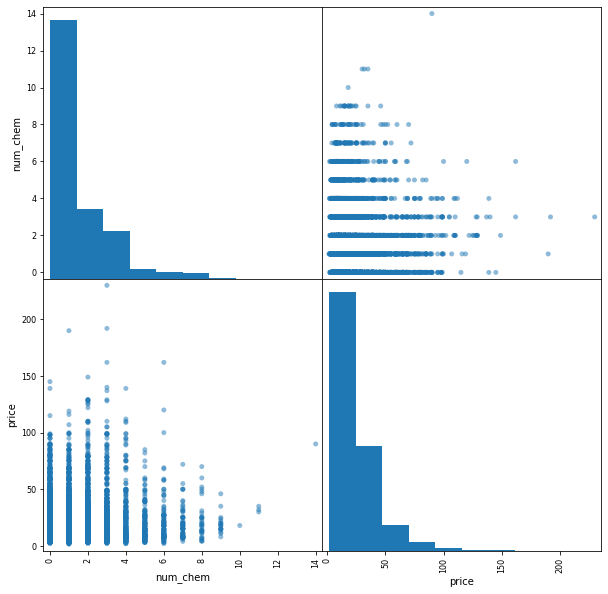

In [33]:
pd.plotting.scatter_matrix(df_matrix, figsize=(10, 10), s=100)

In [34]:
df.mean()

Unnamed: 0     0.000000
num_chem       1.381409
price         23.512428
dtype: float64

In [35]:
df1 = df[df['num_chem'] > 0]
df1 = df1.sort_values('price')
df1

,Unnamed: 0,name,mfg,num_chem,chem,price,category
6138,0,kajal eye pencil,essence,1,['crystalline'],1.49,Eyes
6077,0,eyebrow designer pencil,essence,6,"['methylparaben', 'propylparaben', 'ethylparab...",1.99,Eyes
925,0,travel size makeup remover towlettes,neutrogena,1,['fragrance'],1.99,Cleansers
4768,0,sweet tea & lemon peel-away clay mask,feeling beautiful,4,"['methylchloroisothiazolinone', 'polysorbate',...",1.99,Treatment & Serums
1952,0,colour boost mad about matte liquid lipstick,essence,3,"['crystalline', 'fragrance', 'parfum']",1.99,Lips
...,...,...,...,...,...,...,...
4403,0,prevage anti-aging daily serum,elizabeth arden,6,"['methylparaben', 'propylparaben', 'ethylparab...",162.00,Treatment & Serums
4917,0,snake serum o2,rodial,3,"['triethanolamine', 'fragrance', 'parfum']",162.00,Treatment & Serums
3374,0,power rich,dermalogica,1,['polysorbate'],190.00,Moisturizers
4859,0,perfectionist pro rapid firm + lift treatment ...,estée lauder,3,"['polysorbate', 'fragrance', 'parfum']",192.00,Treatment & Serums


In [68]:
dfn = df.groupby(pd.cut(df['price'], np.arange (0, 240, 20))).mean()
dfn = dfn.drop(['Unnamed: 0', 'price'], axis=1)
dfn = dfn.reset_index()

In [69]:
dfn

,price,num_chem
0,"(0, 20]",1.420030
1,"(20, 40]",1.265853
2,"(40, 60]",1.408318
3,"(60, 80]",1.420601
4,"(80, 100]",1.719101
5,"(100, 120]",2.470588
6,"(120, 140]",2.285714
7,"(140, 160]",1.000000
8,"(160, 180]",4.500000
9,"(180, 200]",2.000000


UsageError: Line magic function `%%capture` not found.


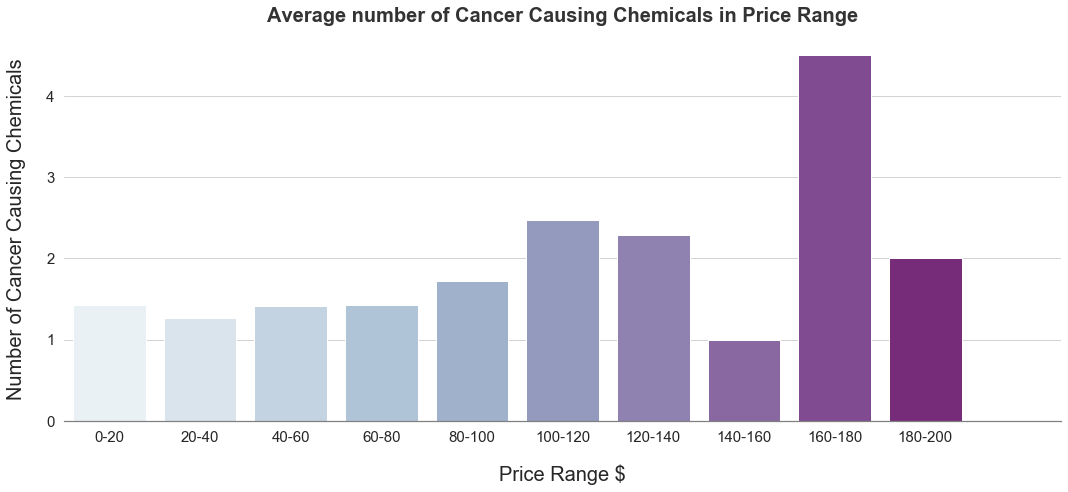

In [258]:


fig, ax = plt.subplots(figsize=(15,7))
x = []
y = []

for num in range(len(dfn['num_chem'])):
    x.append(str(dfn['price'].iloc[num]))
    y.append(dfn['num_chem'].iloc[num])

    

sns.barplot(x,y,palette="BuPu")

plt.xticks(np.arange(10),['0-20','20-40','40-60','60-80','80-100','100-120','120-140','140-160', '160-180', '180-200', '200-220'],size = 15)
plt.yticks(size = 15)
plt.xlabel("Price Range $", fontsize=20, labelpad=20)  
plt.ylabel("Number of Cancer Causing Chemicals", fontsize=20, labelpad=20)  
ax.set_title('Average number of Cancer Causing Chemicals in Price Range', pad=15, color='#333333', fontsize = 20,
             weight='bold')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('grey')

ax.set_axisbelow(True)
ax.yaxis.grid(True, color='lightgrey')
ax.xaxis.grid(False)

fig.tight_layout()
ax.tick_params(bottom=False, left=False)
ax.set_facecolor('white')
%%capture

In [213]:
df_pop = df.drop(['name', 'num_chem', 'chem', 'category'], axis=1)

In [214]:
df_pop

,Unnamed: 0,mfg,price,True,Total
0,0,tarte,27.0,1,1
1,0,it cosmetics,39.5,1,1
2,0,estée lauder,43.0,1,1
3,0,too faced,39.0,0,1
4,0,laura mercier,39.0,1,1
...,...,...,...,...,...
6977,0,house of lashes,8.0,0,1
6978,0,nabla,25.0,0,1
6979,0,urban decay cosmetics,25.0,1,1
6980,0,ulta,9.0,0,1


In [215]:
df_pop = df_pop.groupby(pd.cut(df['price'], np.arange (0, 240, 20))).count()
#dfn = dfn.drop(['Unnamed: 0', 'price'], axis=1)


In [218]:
df_pop

,price,Unnamed: 0,mfg,True,Total
0,"(0, 20]",3964,3964,3964,3964
1,"(20, 40]",2129,2129,2129,2129
2,"(40, 60]",529,529,529,529
3,"(60, 80]",233,233,233,233
4,"(80, 100]",89,89,89,89
5,"(100, 120]",17,17,17,17
6,"(120, 140]",14,14,14,14
7,"(140, 160]",2,2,2,2
8,"(160, 180]",2,2,2,2
9,"(180, 200]",2,2,2,2


In [216]:
df_pop = df_pop.drop('price', axis=1)
df_pop = df_pop.reset_index()

UsageError: Line magic function `%%capture` not found.


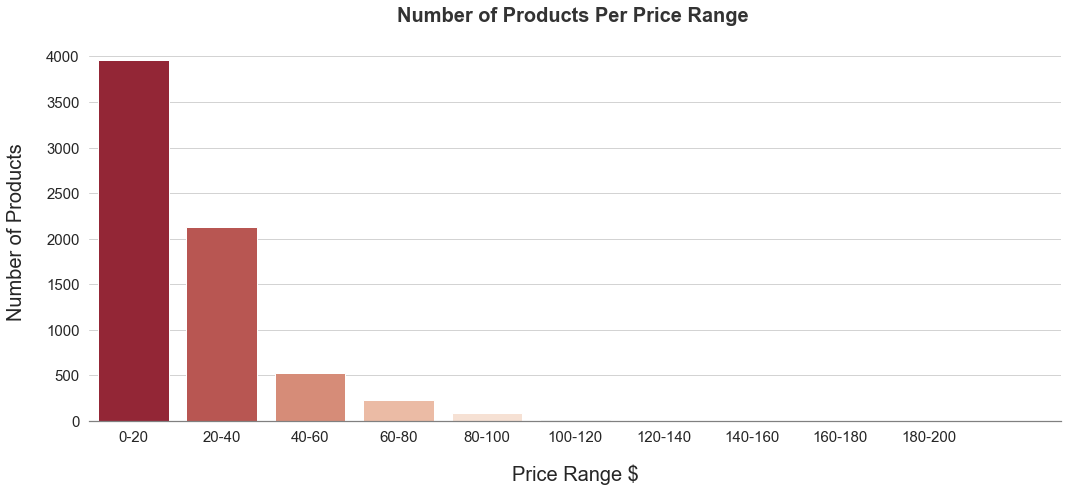

In [249]:
fig, ax = plt.subplots(figsize=(15,7))
x = []
y = []

for num in range(len(dfn['num_chem'])):
    x.append(str(df_pop['price'].iloc[num]))
    y.append(df_pop['mfg'].iloc[num])
    
sns.barplot(x,y,palette="RdBu")

plt.xticks(np.arange(10),['0-20','20-40','40-60','60-80','80-100','100-120','120-140','140-160', '160-180', '180-200', '200-220'],size = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Price Range $", fontsize=20, labelpad=20)  
plt.ylabel("Number of Products", fontsize=20, labelpad=20) 
ax.set_title('Number of Products Per Price Range ', pad=20, color='#333333', fontsize = 20,
             weight='bold')
ax.get_yaxis().set_visible(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('grey')

ax.set_axisbelow(True)

ax.yaxis.grid(True, color='lightgrey')
ax.xaxis.grid(False)

# Create labels
label = x





fig.tight_layout()
ax.tick_params(bottom=False, left=False)
ax.set_facecolor('white')
%%capture

In [177]:
tt = []
for i in range(len(df['num_chem'])):
    if int(df['num_chem'].iloc[i]) >=1:      
        tt.append(1)
    else:
        tt.append(0)
df['True'] = tt
df['Total'] = 1



In [178]:
df_pro = df.groupby(pd.cut(df['price'], np.arange (0, 220, 20))).sum()
df_pro = df_pro.drop(['num_chem', 'price', 'Unnamed: 0'], axis = 1)
df_pro

,True,Total
price,,
"(0, 20]",2475,3964
"(20, 40]",1274,2129
"(40, 60]",339,529
"(60, 80]",158,233
"(80, 100]",60,89
"(100, 120]",16,17
"(120, 140]",13,14
"(140, 160]",1,2
"(160, 180]",2,2


In [179]:
prob = []
for i in range(len(df_pro['True'])):
    if (int(df_pro['Total'].iloc[i])) == 0:
        prob.append(0)
    else:
        prob.append((int(df_pro['True'].iloc[i]))/(int(df_pro['Total'].iloc[i])))
        
df_pro['Prob'] = prob

In [180]:
df_pro = df_pro.drop(['True','Total'], axis = 1).reset_index()

In [181]:
df_pro

,price,Prob
0,"(0, 20]",0.624369
1,"(20, 40]",0.598403
2,"(40, 60]",0.640832
3,"(60, 80]",0.678112
4,"(80, 100]",0.674157
5,"(100, 120]",0.941176
6,"(120, 140]",0.928571
7,"(140, 160]",0.500000
8,"(160, 180]",1.000000
9,"(180, 200]",1.000000


In [182]:
df_pro

,price,Prob
0,"(0, 20]",0.624369
1,"(20, 40]",0.598403
2,"(40, 60]",0.640832
3,"(60, 80]",0.678112
4,"(80, 100]",0.674157
5,"(100, 120]",0.941176
6,"(120, 140]",0.928571
7,"(140, 160]",0.500000
8,"(160, 180]",1.000000
9,"(180, 200]",1.000000


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
UsageError: Line magic function `%%capture` not found.


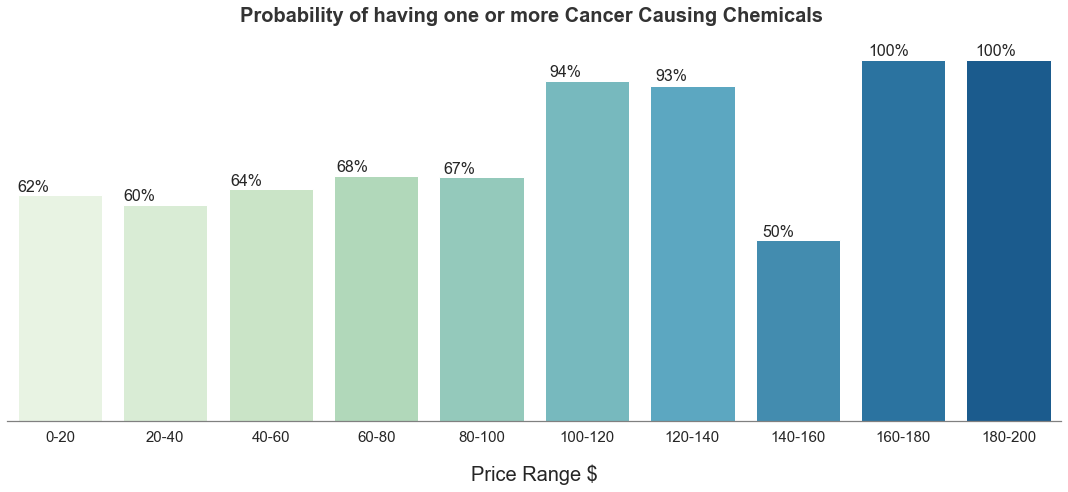

In [252]:
fig, ax = plt.subplots(figsize=(15,7))
x = []
y = []

for num in range(len(df_pro['price'])):
    x.append(str(df_pro['price'].iloc[num]))
    y.append(df_pro['Prob'].iloc[num])
    


sns.barplot(x,y,palette="GnBu")

plt.xticks(np.arange(10),['0-20','20-40','40-60','60-80','80-100','100-120','120-140','140-160', '160-180', '180-200', '200-220'],size = 15)
plt.xlabel("Price Range $", fontsize=20, labelpad=20)  

ax.set_title('Probability of having one or more Cancer Causing Chemicals ', pad=20, color='#333333', fontsize = 20,
             weight='bold')
ax.get_yaxis().set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('grey')

ax.set_axisbelow(True)

ax.yaxis.grid(False)
ax.xaxis.grid(False)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x, y + height + 0.01), fontsize = 16, textcoords='offset points')

fig.tight_layout()
ax.tick_params(bottom=False, left=False)
ax.set_facecolor('white')
%%capture

In [6]:
tt = []
for i in range(len(df['num_chem'])):
    if int(df['num_chem'].iloc[i]) < 1:      
        tt.append(1)
    else:
        tt.append(0)
df['True'] = tt
df['Total'] = 1

In [7]:
df_pro1 = df.groupby(pd.cut(df['price'], np.arange (0, 220, 20))).sum()
df_pro1 = df_pro1.drop(['num_chem', 'price', 'Unnamed: 0'], axis = 1)
df_pro1

,True,Total
price,,
"(0, 20]",1489,3964
"(20, 40]",855,2129
"(40, 60]",190,529
"(60, 80]",75,233
"(80, 100]",29,89
"(100, 120]",1,17
"(120, 140]",1,14
"(140, 160]",1,2
"(160, 180]",0,2


In [10]:
prob1 = []
for i in range(len(df_pro1['True'])):
    if (int(df_pro1['Total'].iloc[i])) == 0:
        prob1.append(0)
    else:
        prob1.append((int(df_pro1['True'].iloc[i]))/(int(df_pro1['Total'].iloc[i])))
        
df_pro1['Prob'] = prob1

In [13]:
df_pro1 = df_pro1.drop(['True','Total'], axis = 1).reset_index()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
UsageError: Line magic function `%%capture` not found.


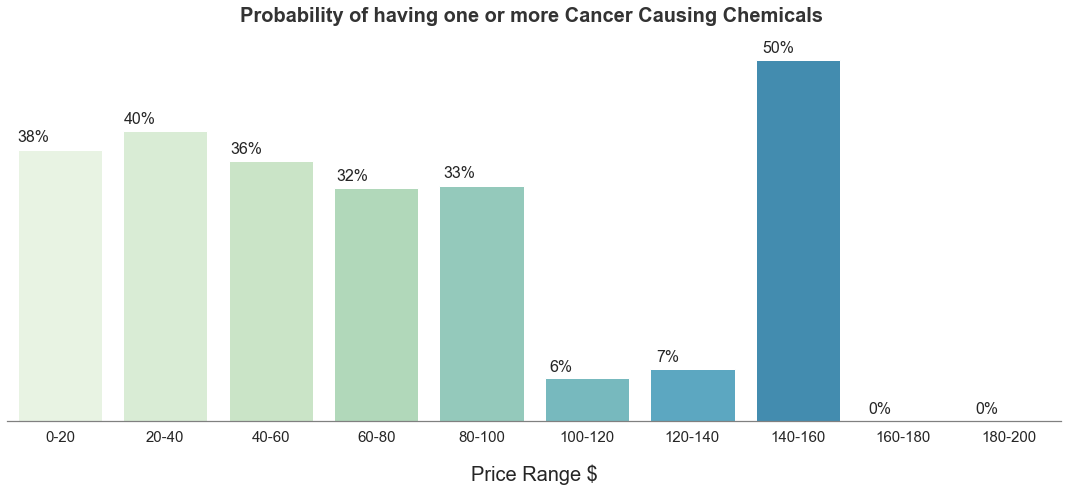

In [14]:
fig, ax = plt.subplots(figsize=(15,7))
x = []
y = []

for num in range(len(df_pro1['price'])):
    x.append(str(df_pro1['price'].iloc[num]))
    y.append(df_pro1['Prob'].iloc[num])
    


sns.barplot(x,y,palette="GnBu")

plt.xticks(np.arange(10),['0-20','20-40','40-60','60-80','80-100','100-120','120-140','140-160', '160-180', '180-200', '200-220'],size = 15)
plt.xlabel("Price Range $", fontsize=20, labelpad=20)  

ax.set_title('Probability of having one or more Cancer Causing Chemicals ', pad=20, color='#333333', fontsize = 20,
             weight='bold')
ax.get_yaxis().set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('grey')

ax.set_axisbelow(True)

ax.yaxis.grid(False)
ax.xaxis.grid(False)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x, y + height + 0.01), fontsize = 16, textcoords='offset points')

fig.tight_layout()
ax.tick_params(bottom=False, left=False)
ax.set_facecolor('white')
%%capture

In [165]:
df_mean = df.groupby(pd.cut(df['price'], np.arange (0, 234, 10))).mean()

In [166]:
df_std = df.groupby(pd.cut(df['price'], np.arange (0, 230, 10))).std()

In [168]:
df_std

,Unnamed: 0,num_chem,price
price,,,
"(0, 10]",0.0,1.687152,2.209617
"(10, 20]",0.0,1.725499,2.938776
"(20, 30]",0.0,1.594504,2.657972
"(30, 40]",0.0,1.515447,2.847089
"(40, 50]",0.0,1.673807,2.795156
"(50, 60]",0.0,1.609425,2.899877
"(60, 70]",0.0,1.379541,2.474457
"(70, 80]",0.0,1.432525,2.812961
"(80, 90]",0.0,2.161157,2.873887


In [5]:
len(df)

6982

In [6]:
print ('Total number of products with chemicals' + ' ' + str(len(df)-len(df1)))
print ('Total number of products without chemical' + ' ' + '2641')

Total number of products with chemicals 4341
Total number of products without chemical 2641


In [ ]:
df1 = df[df['category'] == 'Bath & Body Accessories', 'Bath & Shower','Body Moisturizers', 'Cleansers', 'Eye Treatments', 'Eyes', 'Face', 'Hand & Foot Care', 'Korean Skin Care', 'Lips', 'Moisturizers', 'Skin', 'Skin Care'    ]

In [ ]:
df = df.groupby('category').mean()
df

In [ ]:
df_cat = df['Bath & Body Accessories', 'Bath & Shower', 'Body Moisturizers' ]

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
x = []
y= []
for num in range(len(df['num_chem'])):
    x.append(df['category'].iloc[num])
    y.append(df['num_chem'].iloc[num])

ax.bar(x,y)
plt.xticks(rotation=90)